In [77]:
#####  Alternative Preprocessing Steps and Automatic Image Categorization and Labelling #####
## lYDIA A. ZELEKE

In [78]:
#  Esc + B to insert cell below
import numpy as np
import cv2

#Comment: The purpose of the above line is to display matplotlib plots inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import statistics
import imutils 
import argparse

from PIL import Image
plt.rcParams['figure.dpi'] = 400

In [79]:

def cropAndLabelDataset(img, blurred, square_rects):
    index =0 

    var = r"C:\Users\AV\Desktop\Semester 2\DIP\project\data\cropped_test2"
    for rect in square_rects:

        mask =  np.zeros(img.shape[:2], dtype=np.uint8)*255
        mask[rect[0][1]:rect[1][1],rect[0][0]:rect[1][0]] = 255
#         cv2.rectangle(mask ,rect[0], rect[1], (255,255,255), 3)
        image_new2 = cv2.bitwise_and(blurred, blurred, mask =mask)[rect[0][1]:rect[1][1],rect[0][0]:rect[1][0]]
        image_new3 = blurred[rect[0][1]:rect[1][1],rect[0][0]:rect[1][0]]
#       image_new = blurred[rect[0][1]:rect[1][1],rect[0][0]:rect[1][0]]
        
        image_new = cv2.bitwise_not(image_new2)
      
        blur = cv2.GaussianBlur(image_new,(7,7),0)

        currentNumber = int(index/12) + 1  

        if range(0,11):
            path = "{}\{}".format(var, currentNumber)
        elif currentNumber == 11:
            path = "{}\{}".format(var, 20)
        elif currentNumber == 12:
            path = "{}\{}".format(var, 30)
        elif currentNumber == 13:
            path = "{}\{}".format(var, 40)
        elif currentNumber == 14:
            path = "{}\{}".format(var, 50)
        elif currentNumber == 15:
            path = "{}\{}".format(var, 60)
        elif currentNumber == 16:
            path = "{}\{}".format(var, 70)
        elif currentNumber == 17:
            path = "{}\{}".format(var, 80)
        elif currentNumber == 18:
            path = "{}\{}".format(var, 90)
        elif currentNumber == 19:
            path = "{}\{}".format(var, 100) 
        elif currentNumber == 20:
            path = "{}\{}".format(var, 1000)    


    #     print(currentNumber )
        if os.path.isdir(path) == False:
            try:
                os.makedirs(path)
            except OSError:
                print ("Creation of the directory %s failed" % path)
            else:
                print ("Successfully created the directory %s " % path)

        path2, dirs, files = next(os.walk(path))
        file_count = len(files)
        cv2.imwrite("{}\{}.png".format(path, str(file_count)), image_new)

    #     print("{}\{}".format(var, currentNumber))
    #     print("{}\{}.png".format(path, str(index+1)))

        index+=1 

    print('Done')
    return



In [80]:

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = []
    contours = []
    square_areas = []
    m = -1
    for j, cnt in enumerate(cnts):
        (x, y, w, h) = cv2.boundingRect(cnt)
        ar = w / float(h)
        if 0.6 < ar < 0.7:
            boundingBoxes.append(((x,y), (x+w, y+h)))
            contours.append(cnt)
            square_areas.append(w*h)
            m+=1
  
    (contours, boundingBoxes, square_areas) = zip(*sorted(zip(contours, boundingBoxes, square_areas),key=lambda b:b[1][i],
                                                          reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (contours, boundingBoxes,square_areas)




    
def preprocessData(path_to_image):
    print('image')
    print(path_to_image)
    img0 = cv2.imread(path_to_image,0)
    img = img0
    ret,thresh1 = cv2.threshold(img0,230,255,cv2.THRESH_BINARY)

    gray_image = img0
    Blurred_image = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)

    
#     plt.subplot(2,2,1)
#     plt.imshow(thresh1)
#     plt.subplot(2,2,2)
#     plt.imshow(Blurred_image)   
    
    thresh1 = Blurred_image
    
    var2 = r"C:\Users\AV\Desktop\Semester 2\DIP\project\data\cropped_test2"
    path = "{}\{}".format(var2, 1)
    cv2.imwrite("{}\{}.png".format(path, str('thresh1')), thresh1)
    cv2.imwrite("{}\{}.png".format(path, str('blurred')), Blurred_image)    
    
    ret,thresh3 = cv2.threshold(thresh1,10,255,0)

    ## Find the Contours or the boundary points of all the shapes in th image ### 
    (contours0, hierarchy) = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    cnts = imutils.grab_contours((contours0,hierarchy))

    square_rects= []
    ## Sort contours, extract rectangle around the geez number contours and obtain the sorted rectangles as well rectangle areas ##
    ## Sorting order from left to right ##
    (contours, square_rects, square_areas)  = sort_contours(contours0,"left-to-right")


    ## Further selection of the proper contours by using a median area size limit 
    median_size_limit= statistics.median(square_areas) *0.6
    square_rects = [rect for i, rect in enumerate(square_rects)
                        if square_areas[i] > median_size_limit]
    
    cropAndLabelDataset(img, thresh1, square_rects)
    
#     for rect in square_rects:
#         cv2.rectangle(edged, rect[0], rect[1], (205,155,50), 1)
    
#     cv2.imshow('edge detection',edged)
#     cv2.waitKey(0)


#     #dilation
#     kernel = np.ones((1,1), np.uint8)
#     img_dilation = cv2.dilate(thresh1, kernel, iterations=1)
#     eroded=cv2.erode(img_dilation,kernel)
#     edged = cv2.Canny(thresh1, 20, 255)

   
    return



C:\Users\AV\Desktop\Semester 2\DIP\project\data\Scanned_forms\0019.jpg
image
C:\Users\AV\Desktop\Semester 2\DIP\project\data\Scanned_forms\0019.jpg
Done


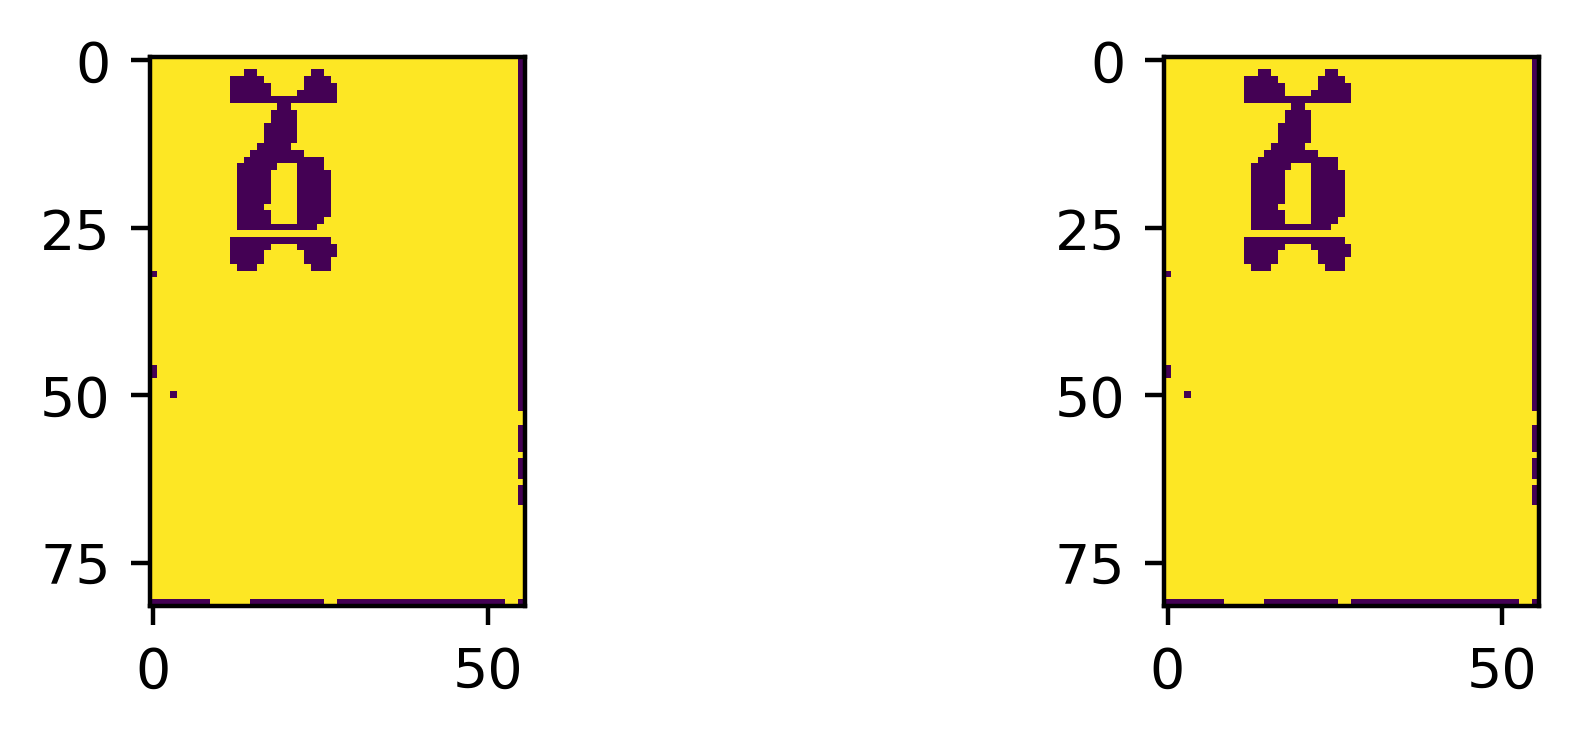

In [81]:

  ###   This is the Program Section That Runs Everything Else   ###
scanned_directory = r"C:\Users\AV\Desktop\Semester 2\DIP\project\data\Scanned_forms"

for filename in os.listdir(scanned_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print("{}\{}".format(scanned_directory, filename))
        image = "{}\{}".format(scanned_directory, filename)
        preprocessData(image)
        
    ###  -------------------------------------   ###
        